In [18]:
%cd /Mounts/rbg-storage1/users/quach/cxr-project/clm
%load_ext autoreload
%autoreload 2

/Mounts/rbg-storage1/users/quach/cxr-project/clm
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
from clm import utils

In [20]:
import seaborn as sns
sns.set_context('paper', font_scale=2.0, rc={'figure.figsize': (5, 4)})


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from clm import utils

def plot_result(base, methods, name):
    named_results = {}
    epsilons = None
    
    for method_name, prefix in methods.items():
        filename = os.path.join(base, f"{prefix}_components.npz")
        output = np.load(filename, allow_pickle=True)
        result = output['results'].item()
        result['configs'] = np.expand_dims(result['taus'],axis=2)
        named_results[method_name] = result
        epsilons = output['epsilons']
    
    plt.tight_layout()
    ax = utils.plot_results(named_results, epsilons, 'recall')
    ax.set_ylabel(r'Recall')
    ax.set_xlabel(r'Risk Level ($\alpha$)')
    plt.savefig(f'notebooks/figures/{name}_recall.png', dpi=100, bbox_inches='tight')
    
    ax = utils.plot_results(named_results, epsilons, 'C_size_avg')
    ax.set_ylabel(r'Number of components')
    ax.set_xlabel(r'Risk Level ($\alpha$)')
    ax.set_ylim(0, 26)
    plt.savefig(f'notebooks/figures/{name}_num_components.png', dpi=100, bbox_inches='tight')
    
    ax = utils.plot_results(named_results, epsilons, 'L_avg', add_diagonal=True, ylim_is_xlim=True)
    ax.set_ylabel(r'Component Loss')
    
    ax = utils.plot_results(named_results, epsilons, 'taus', add_diagonal=True, ylim_is_xlim=True)
    ax.set_ylabel(r'tau')
    # plt.savefig(f'figures/{name}_loss.png', dpi=100)
    
    axes = []

<Figure size 640x480 with 0 Axes>

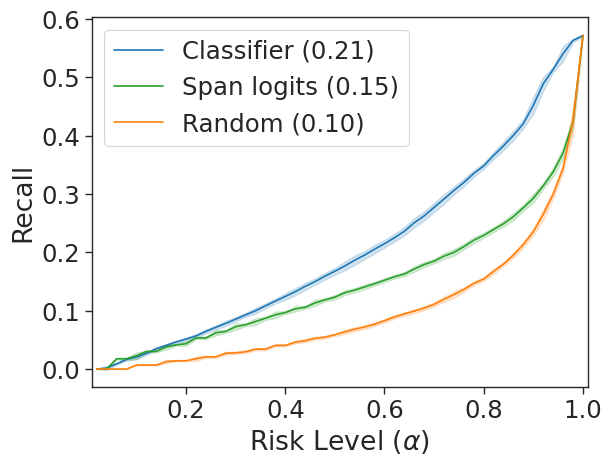

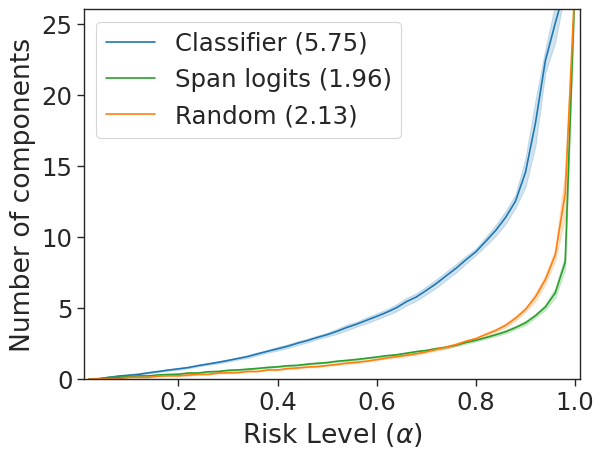

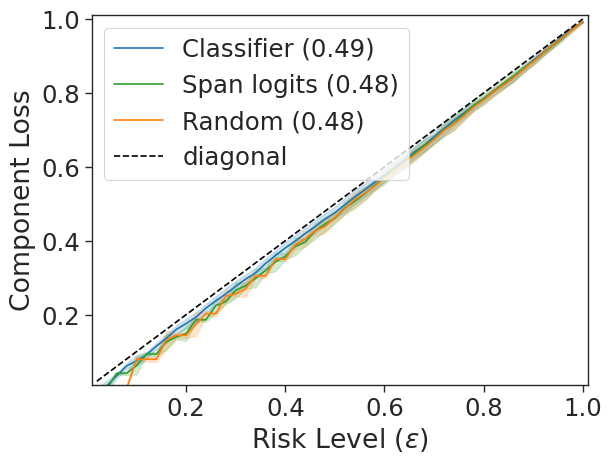

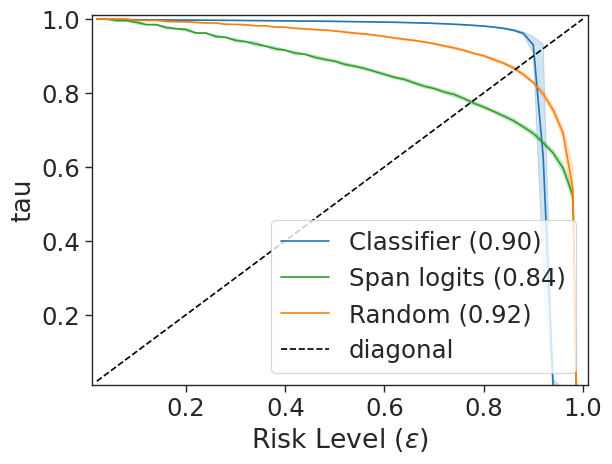

In [42]:
base = '/Mounts/rbg-storage1/users/quach/cxr-project/clm/results/cnndm/test/filter_True/rouge_0.4'

plot_result(base,  {
    # 'Image': 'image',
    # 'NLI classifier': 'nli',
    'Classifier': 'nli',
    'Span logits': 'probs',
    'Random': 'random',
    # 'First-K': 'firstk',
}, "cnndm")

In [45]:
filename = os.path.join(base, f"nli_components.npz")
output = np.load(filename, allow_pickle=True)

In [53]:
output['results'].item()['taus'].mean(axis=0)

array([            nan,  9.99380280e-01,  9.99192714e-01,  9.98436711e-01,
        9.98115128e-01,  9.97978676e-01,  9.97813926e-01,  9.97578390e-01,
        9.97409276e-01,  9.97228811e-01,  9.97079416e-01,  9.96928616e-01,
        9.96722484e-01,  9.96545725e-01,  9.96372883e-01,  9.96181355e-01,
        9.95967657e-01,  9.95767920e-01,  9.95505433e-01,  9.95258163e-01,
        9.95013380e-01,  9.94768410e-01,  9.94463305e-01,  9.94195131e-01,
        9.93875671e-01,  9.93582178e-01,  9.93230041e-01,  9.92820733e-01,
        9.92461511e-01,  9.92028688e-01,  9.91593387e-01,  9.91125324e-01,
        9.90553687e-01,  9.89774434e-01,  9.89130680e-01,  9.88188466e-01,
        9.87116739e-01,  9.85812325e-01,  9.84425860e-01,  9.82708924e-01,
        9.80892466e-01,  9.78138848e-01,  9.74750430e-01,  9.69696940e-01,
        9.61208607e-01,  9.29874527e-01,  6.26182242e-01,  7.78193866e-03,
        7.52006380e-08,  2.00037012e-19, -1.00000000e+00])

In [56]:
idx = output['results'].item()['L_avg'].mean(axis=0) <0.7

In [57]:
output['results'].item()['taus'].mean(axis=0) [idx]

array([       nan, 0.99938028, 0.99919271, 0.99843671, 0.99811513,
       0.99797868, 0.99781393, 0.99757839, 0.99740928, 0.99722881,
       0.99707942, 0.99692862, 0.99672248, 0.99654573, 0.99637288,
       0.99618135, 0.99596766, 0.99576792, 0.99550543, 0.99525816,
       0.99501338, 0.99476841, 0.99446331, 0.99419513, 0.99387567,
       0.99358218, 0.99323004, 0.99282073, 0.99246151, 0.99202869,
       0.99159339, 0.99112532, 0.99055369, 0.98977443, 0.98913068,
       0.98818847])

<Figure size 640x480 with 0 Axes>

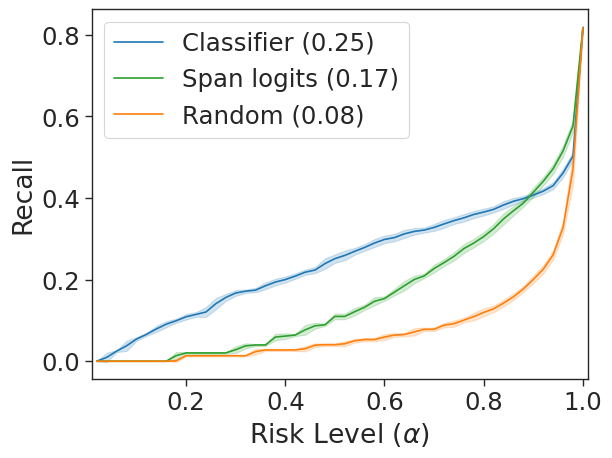

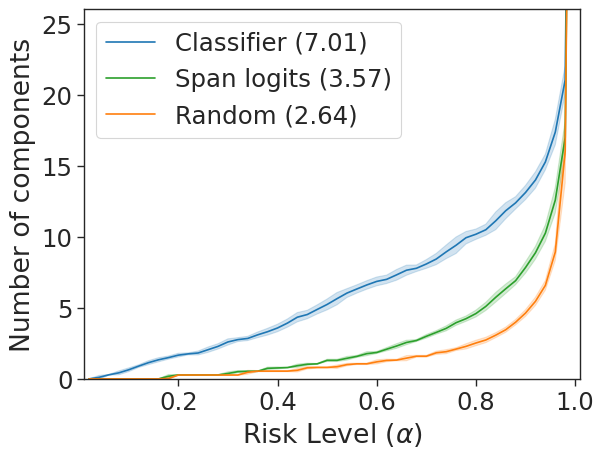

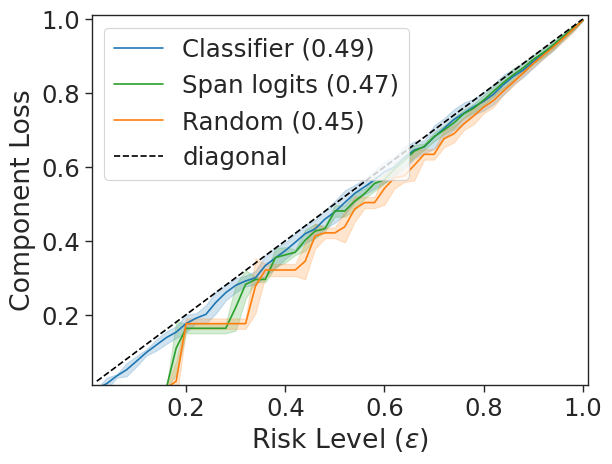

In [26]:
base = '/Mounts/rbg-storage1/users/quach/cxr-project/clm/results/cxr/test/filter_True/rouge_0.4'

plot_result(base,  {
    # 'Image classifier': 'image',
    'Classifier': 'image',
    # 'NLI': 'nli',
    'Span logits': 'probs',
    'Random': 'random',
    # 'First-K': 'firstk',
}, "cxr")